## Boston House Price Prediction

### Introduction About The Data:

The goal is to predict house price in Boston using linear regression model.

There are 13 independent variables:

* `CRIM` : per capita crime rate by town
* `ZN` : proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` : proportion of non-retail business acres per town
* `CHAS` : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* `NOX` : nitric oxides concentration (parts per 10 million)
* `RM` : average number of rooms per dwelling
* `AGE` : proportion of owner-occupied units built prior to 1940
* `DIS` : weighted distances to five Boston employment centres
* `RAD` : index of accessibility to radial highways
* `TAX` : full-value property-tax rate per $10,000
* `PTRATIO` : pupil-teacher ratio by town
* `B` : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` : % lower status of the population

Target variable:

* `MEDV` : Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd

## Data Ingestions step
df = pd.read_csv('data/boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
## check for duplicated records
df.duplicated().sum()

0

In [5]:
## segregate numerical and categorical columns

numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']

print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


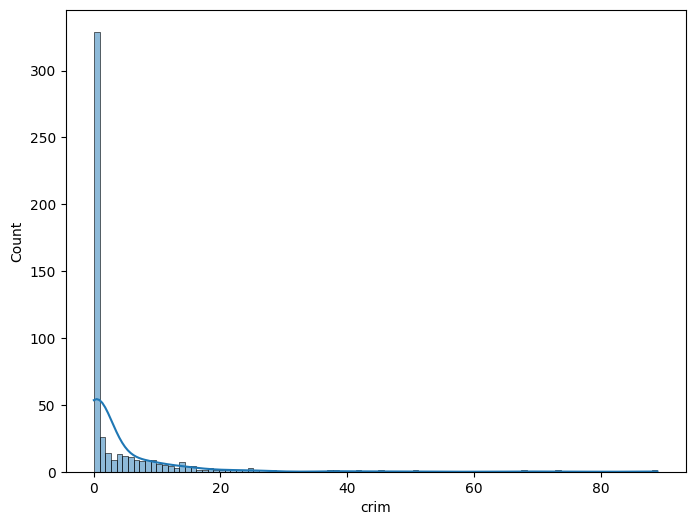

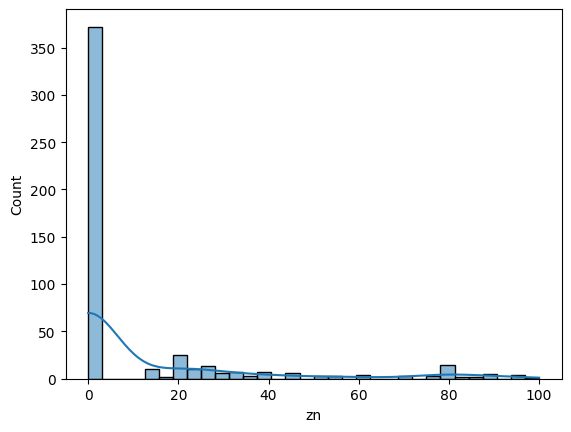

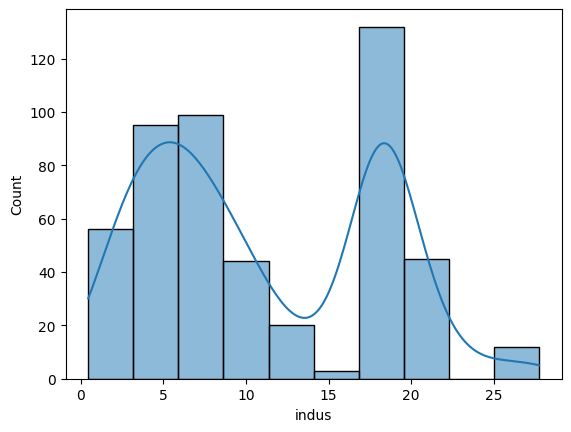

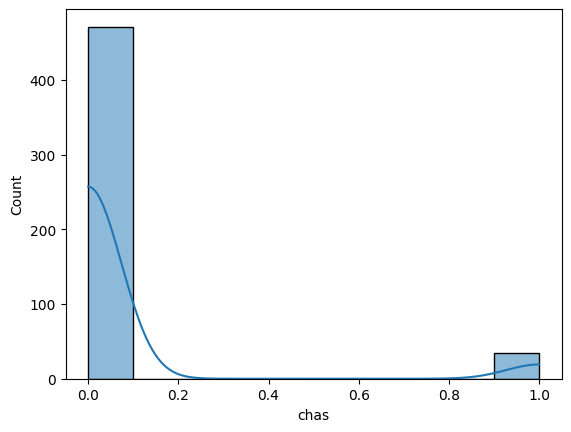

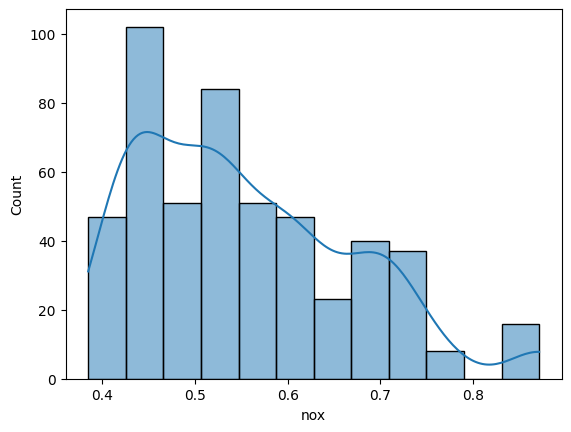

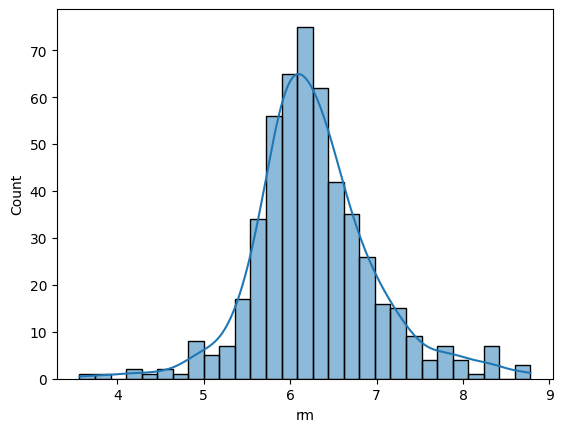

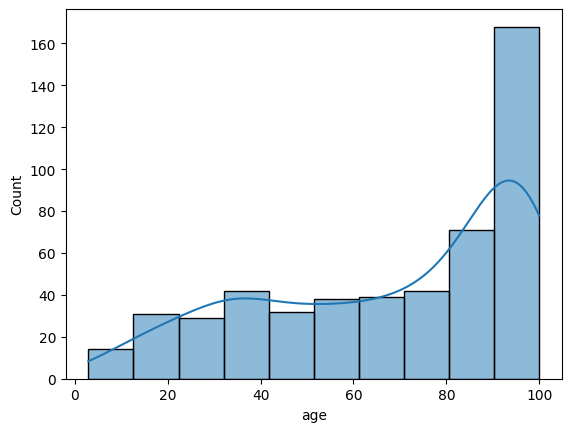

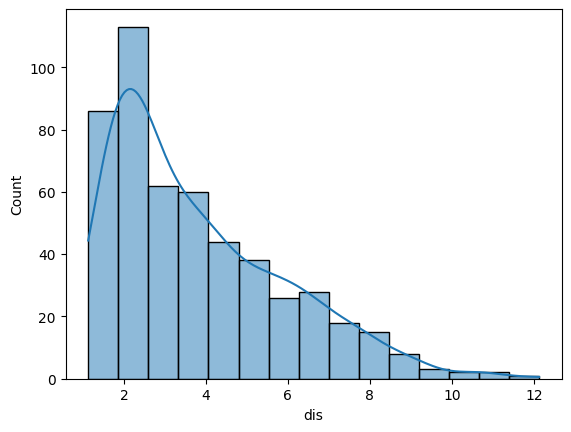

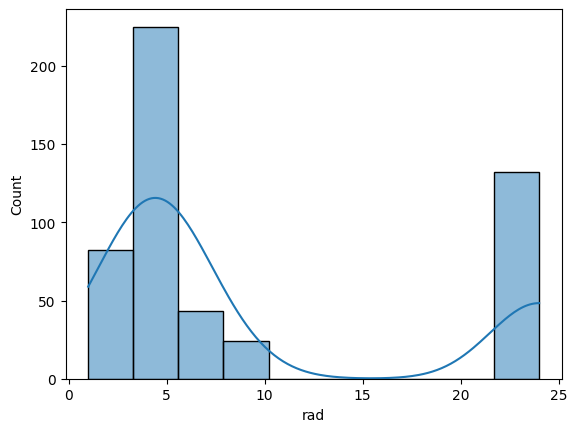

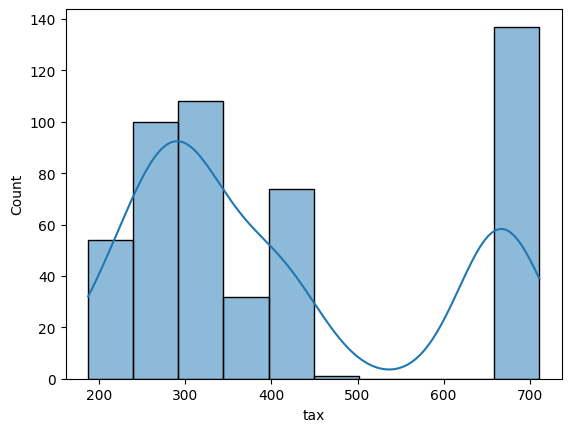

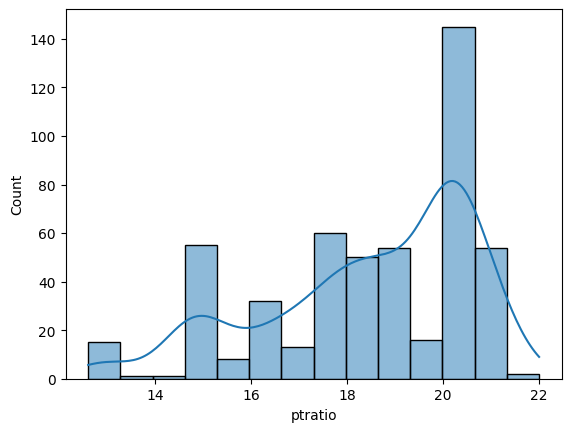

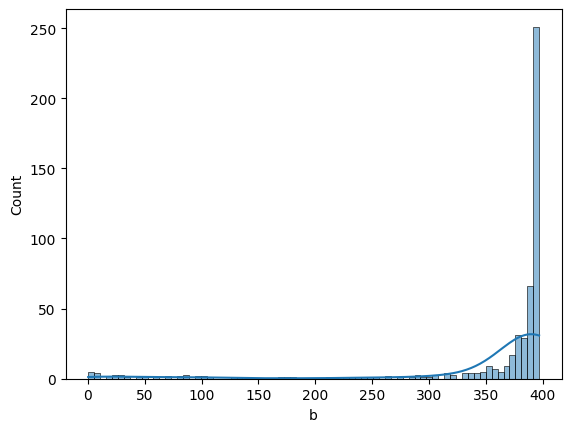

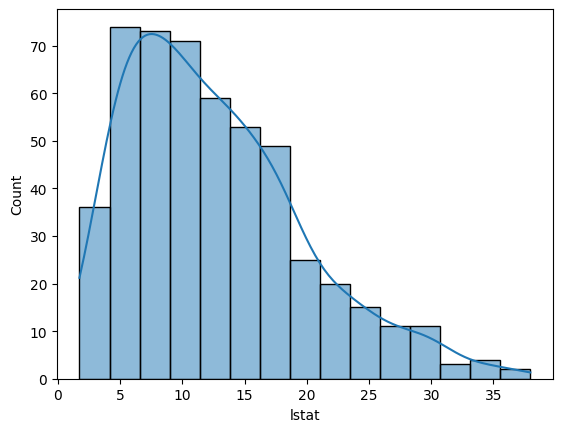

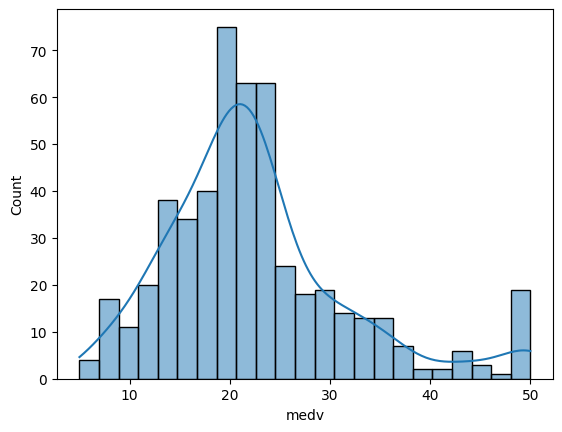

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
# x = 0
for i in numerical_columns:
    sns.histplot(data=df, x=i, kde=True)
    print('\n')
    plt.show()

In [7]:
! pip install seaborn

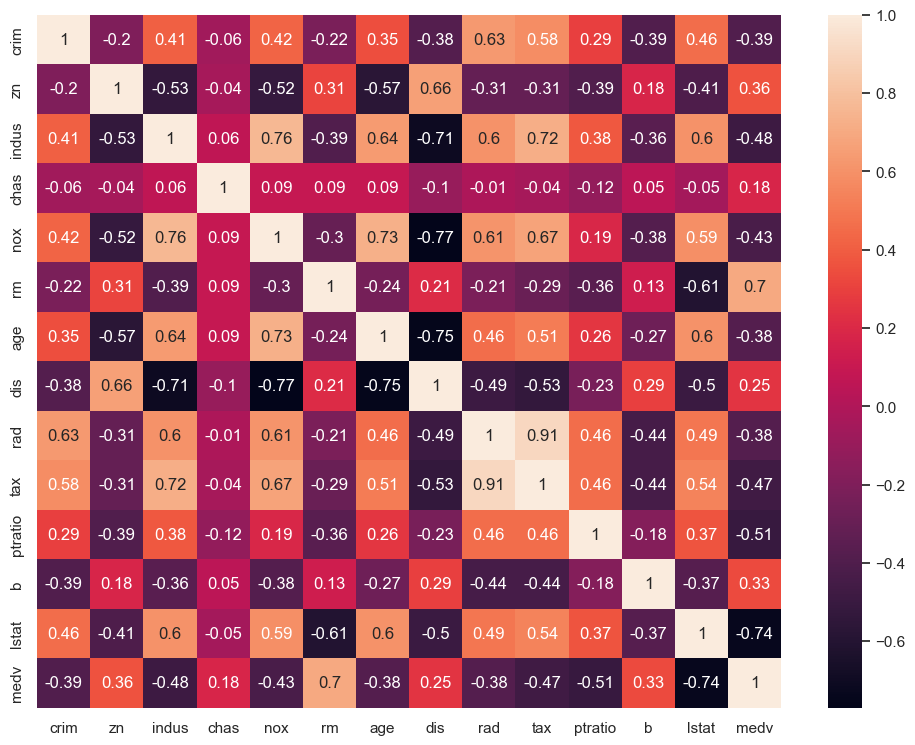

In [8]:
## correlation
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [9]:
## Correlation status

# intercorrelation observed for following features: 

# 1) INDUS vs NOX, DIS, TAX -> 0.76, -0.71, 0.72
# 2) NOX vs AGE, DIS -> 0.73, -0.77 
# 3) AGE vs DIS -> -0.75
# 4) RAD vs TAX -> 0.91
# 5) MEDV vs RM, LSTAT -> 0.7, -0.74